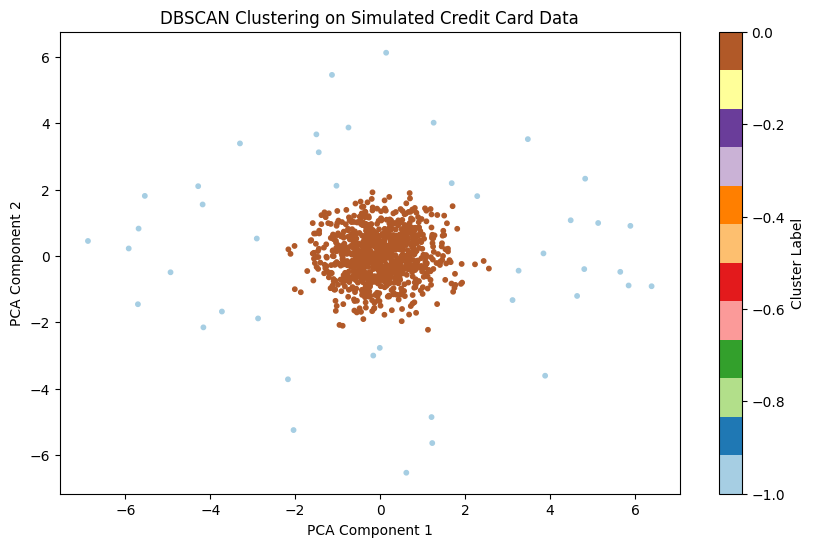

Detected anomalies (label = -1): 43


In [1]:
# Question 7: DBSCAN on a Real-World Dataset for Anomaly Detection
# Description: Perform DBSCAN on a credit card transaction dataset to detect anomalies.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

normal_data, _ = make_blobs(n_samples=950, centers=[[0, 0]], cluster_std=0.8, random_state=42)
anomalies = np.random.uniform(low=-6, high=6, size=(50, 2))  

X = np.vstack([normal_data, anomalies])
y_true = np.array([0]*950 + [1]*50)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X_pca)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Paired', s=10)
plt.title("DBSCAN Clustering on Simulated Credit Card Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

anomaly_count = np.sum(labels == -1)
print(f"Detected anomalies (label = -1): {anomaly_count}")
